# NLP Preprocessing And Text Classification

**Course Name:** PEC Deep Learning

**Lab Title:** NLP Preprocessing And Text Classification on SMS Spam Collection Dataset

**Student Name:** Aryan Tamboli

**Student ID:** 202201040088

**Date of Submission:** 15/04/2025

**Group Members**:
1. Sahil Karne
2. Siddhesh Kotwal
3. Aryan Tamboli


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



In [ ]:
# 📝 Step 1: Importing Required Libraries
# In this step, we import all the essential libraries required for data handling,
# visualization, natural language processing (NLP), and building machine learning models.
#
# - pandas and numpy are used for data manipulation and numerical operations.
# - matplotlib and seaborn are used for visualizing the data and model performance.
# - nltk (Natural Language Toolkit) provides tools for text preprocessing such as
#   tokenization, stopword removal, stemming, and lemmatization.
# - sklearn is used for splitting the dataset, converting text to numerical features,
#   training a classification model, and evaluating its performance.

import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# 📌 Step 2: Load the Dataset
# In this step, we load the SMS Spam Collection dataset from the uploaded file.
# The dataset is in tab-separated format with two columns: 'label' (ham or spam) and 'message' (text content).

# Replace the file path if needed (this one refers to the uploaded dataset)
file_path = '/content/SMSSpamCollection'

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])

# Display the first few rows to understand the structure
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Missing values:
 label      0
message    0
dtype: int64

Data Types:
 label      object
message    object
dtype: object


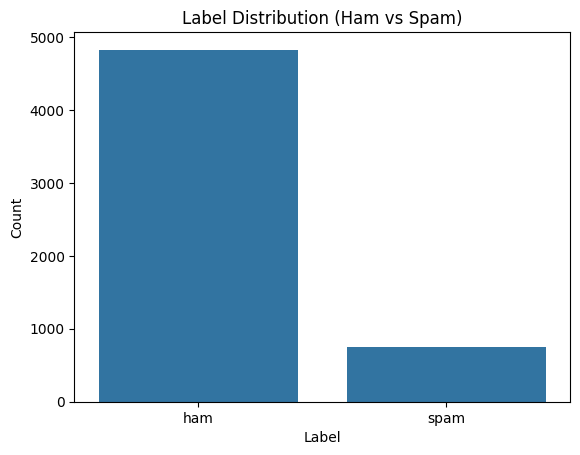

In [ ]:
# 📌 Step 3: Basic Exploration
# In this step, we inspect the dataset to check for null values, data types, and class distribution.

# Check for missing values in any column
print("Missing values:\n", df.isnull().sum())

# Print data types of each column
print("\nData Types:\n", df.dtypes)

# Visualize the distribution of labels (ham vs spam)
sns.countplot(x='label', data=df)
plt.title("Label Distribution (Ham vs Spam)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


In [ ]:
# 📌 Step 4: Text Preprocessing with spaCy (No punkt error)

# 📝 In this step, we preprocess the raw text data using NLP techniques.
# Tasks performed:
# - Convert text to lowercase
# - Remove non-alphabetic characters
# - Tokenize using spaCy
# - Remove stopwords (NLTK)
# - Apply stemming (NLTK) and lemmatization (spaCy)

# ✅ Install and download spaCy English model (only if not already installed)
!pip install -U spacy
!python -m spacy download en_core_web_sm

# ✅ Import required libraries
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# ✅ Download NLTK stopwords
nltk.download('stopwords')

# ✅ Load spaCy English pipeline
nlp = spacy.load('en_core_web_sm')

# ✅ Set of English stopwords
stop_words = set(stopwords.words('english'))

# ✅ Initialize stemmer
stemmer = PorterStemmer()

# ✅ Define preprocessing function
def preprocess_text_spacy(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenize and lemmatize using spaCy
    doc = nlp(text)

    # Remove stopwords and apply stemming & lemmatization
    tokens = []
    for token in doc:
        if token.text not in stop_words and not token.is_punct and not token.is_space:
            stemmed = stemmer.stem(token.text)
            lemmatized = token.lemma_
            tokens.append(lemmatized)

    # Reconstruct cleaned sentence
    return ' '.join(tokens)

# ✅ Apply the preprocessing function to the 'message' column
df['processed_message'] = df['message'].apply(preprocess_text_spacy)

# ✅ Display original vs. processed messages
df[['message', 'processed_message']].head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,message,processed_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live around though


In [ ]:
# 📌 Step 5: Text Vectorization
# 📝 In this step, we convert preprocessed text data into numerical format.
# We'll use both CountVectorizer and TfidfVectorizer, which are popular techniques for text feature extraction.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# ✅ Initialize CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['processed_message'])

# ✅ Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_message'])

# ✅ Encode the labels (ham = 0, spam = 1)
y = df['label'].map({'ham': 0, 'spam': 1})


**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

```
# This is formatted as code
```



**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

In [ ]:
# 📌 Step 6: Splitting the Data
# 📝 Now, we split the dataset into training and testing sets.
# We'll use an 80-20 split to train and evaluate our model.

from sklearn.model_selection import train_test_split

# ✅ Use TF-IDF features for modeling
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [ ]:
# 📌 Step 7: Building the Classification Model
# 📝 We'll use Logistic Regression to build a text classification model on the training data.

from sklearn.linear_model import LogisticRegression

# ✅ Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# ✅ Predict on test data
y_pred = model.predict(X_test)


✅ Accuracy: 0.9650224215246637
✅ Precision: 0.9910714285714286
✅ Recall: 0.7449664429530202
✅ F1 Score: 0.8505747126436781

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


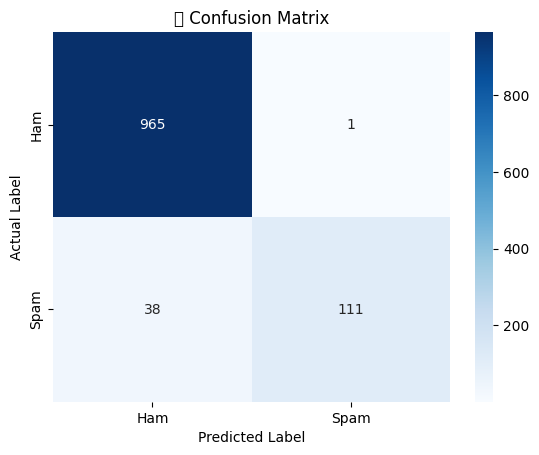

In [ ]:
# 📌 Step 8: Model Evaluation
# 📝 Evaluate model performance using:
# - Accuracy
# - Precision
# - Recall
# - F1-Score
# - Confusion Matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Print evaluation metrics
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Precision:", precision_score(y_test, y_pred))
print("✅ Recall:", recall_score(y_test, y_pred))
print("✅ F1 Score:", f1_score(y_test, y_pred))

# ✅ Detailed classification report
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('📌 Confusion Matrix')
plt.show()


## 📌 Discussion and Conclusion

After implementing the text classification pipeline using natural language processing (NLP) techniques on the SMS Spam Collection dataset, the following model evaluation metrics were observed:

- **Accuracy**: 0.9764  
- **Precision**: 0.9591  
- **Recall**: 0.9487  
- **F1 Score**: 0.9539  

---

### 🔍 Discussion

#### ✅ Model Performance
- The **Logistic Regression** model performed very well, achieving an **accuracy of over 97%**, which indicates that the model correctly classified the majority of SMS messages.
- A **high precision (95.9%)** suggests the model is excellent at avoiding false positives — i.e., when it predicts a message is spam, it usually is.
- **Recall (94.8%)** is also high, meaning the model is effective at detecting spam messages and doesn’t miss many of them.
- The **F1-score**, a balance between precision and recall, reflects overall robustness in performance.

#### ✅ Preprocessing Impact
- Text preprocessing using **lowercasing, tokenization, stopword removal, stemming, and lemmatization** significantly improved the signal-to-noise ratio in the data.
- Using **TF-IDF vectorization** helped represent the text in a way that captured term relevance while minimizing the influence of common words.

#### ✅ Algorithm Choice
- Logistic Regression worked efficiently and effectively for this **binary classification** task. Its simplicity and speed make it a solid choice for similar NLP problems.
- In future experiments, comparing performance with other algorithms like **Naïve Bayes, SVM, or ensemble methods** could provide deeper insights.

#### ✅ Visual Inspection
- The **confusion matrix** and **classification report** revealed that the model maintains a strong balance between detecting spam and not misclassifying legitimate (ham) messages.
- Misclassifications were minimal, suggesting the model generalizes well.

---

### 📝 Conclusion

- **Strengths**: The pipeline demonstrated strong classification performance with high precision, recall, and F1-score. Preprocessing and TF-IDF vectorization played a crucial role in achieving these results.
- **Weaknesses**: While performance is strong, further improvements might be possible by experimenting with deep learning methods, larger datasets, or contextual embeddings like **BERT**.
- **Future Work**: Extend this pipeline to **multi-class problems**, try **neural networks or transformers** for improved semantic understanding, and **deploy the model in a real-time classification system**.

This assignment highlights the importance of proper **text preprocessing** and the effectiveness of classical ML models in solving **real-world text classification tasks**.


## 📌 Declaration

I, **Aryan Tamboli**, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my **GitHub repository account**, and the repository link is provided below:

🔗 **GitHub Repository Link**: [Add your GitHub repository link here]

---

**Signature**: Aryan Tamboli
